Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected
Line Detected


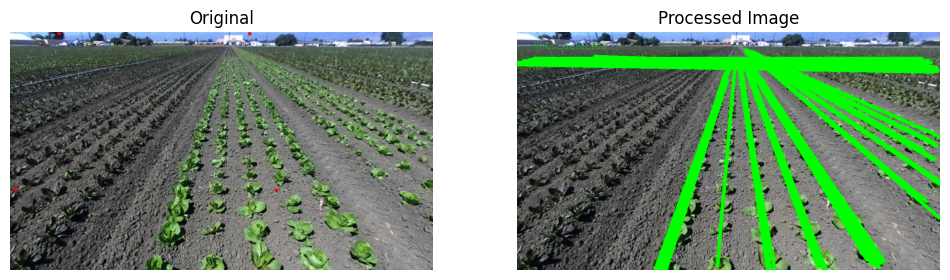

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("crops.png")
original = img.copy()

# Draw reference points
cv2.circle(original, (148, 4), 5, (0, 0, 255), -1)
cv2.circle(original, (725, 5), 5, (0, 0, 255), -1)
cv2.circle(original, (16, 477), 5, (0, 0, 255), -1)
cv2.circle(original, (805, 478), 5, (0, 0, 255), -1)

# # Perspective transform
# pts1 = np.float32([[148, 4], [725, 5], [16, 477], [805, 478]])
# pts2 = np.float32([[0, 0], [400, 0], [0, 600], [400, 600]])
# matrix = cv2.getPerspectiveTransform(pts1, pts2)
# img = cv2.warpPerspective(img, matrix, (500, 600))

# Mask setup (currently blank)
mask = np.zeros(img.shape, dtype=np.uint8)
channel_count = img.shape[2]
ignore_mask_color = (255,) * channel_count
masked_image = cv2.bitwise_and(img, mask)
img2 = cv2.subtract(img, masked_image)

# HSV thresholding
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
lower_blue = np.array([45, 62, 52])
upper_blue = np.array([72, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
result = cv2.bitwise_and(img2, img2, mask=mask)

# Skeletonization
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
edges = gray
skel = np.zeros(edges.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

while True:
    open_img = cv2.morphologyEx(edges, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(edges, open_img)
    eroded = cv2.erode(edges, element)
    skel = cv2.bitwise_or(skel, temp)
    edges = eroded.copy()
    if cv2.countNonZero(edges) == 0:
        break

# Hough Line detection
lines = cv2.HoughLinesP(skel, 4, np.pi / 180, 1000, maxLineGap=1500)

if lines is None:
    print("Line Not Detected")
else:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 10)
        cv2.putText(img, 'lines_detected', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1)
        print("Line Detected")

# Convert BGR to RGB for display in matplotlib
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
processed_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display images using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_rgb)
plt.title('Processed Image')
plt.axis('off')

plt.show()
